In [59]:
# !pip install numpy==1.19.5
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random as rd
import tensorflow as tf

from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense

from sklearn.model_selection import train_test_split

In [60]:
def import_data():
    """
    Import data and split into features and labels
    """
    data = pd.read_csv('data_kia.csv').values
    x_data = data[:, :51]
    y_data = data[:, 52]
    return x_data, y_data

data, labels = import_data()
data

array([[268.8, 0.0, 5.2, ..., -8.8, 0, -3.4],
       [243.2, 0.0, 6.1, ..., -0.2, 0, -3.6],
       [217.6, 0.0, 5.2, ..., -0.2, 0, -3.6],
       ...,
       [345.6, 0.0, 6.6, ..., 0.0, 0, -13.2],
       [332.8, 0.0, 5.7, ..., 0.0, 0, -13.3],
       [281.6, 0.0, 5.2, ..., -0.1, 0, -13.3]], dtype=object)

In [61]:
def normalize_data(rows):
    max_columns = rows.max(axis=0)
    min_columns = rows.min(axis=0)
    norm_rows = np.empty(rows.shape)
    for i in range(rows.shape[1]):
        for j in range(rows.shape[0]):
            if ((max_columns[i]-min_columns[i])>0):
                norm_rows[j][i] = (rows[j][i] - min_columns[i])/(max_columns[i]-min_columns[i])
            else:
                norm_rows[j][i] = 0
    return norm_rows

normal_data = normalize_data(data)
normal_data


array([[0.02459016, 0.        , 0.052     , ..., 0.07650273, 0.        ,
        0.49030656],
       [0.02224824, 0.        , 0.061     , ..., 0.54644809, 0.        ,
        0.49011556],
       [0.01990632, 0.        , 0.052     , ..., 0.54644809, 0.        ,
        0.49011556],
       ...,
       [0.03161593, 0.        , 0.066     , ..., 0.55737705, 0.        ,
        0.48094738],
       [0.03044496, 0.        , 0.057     , ..., 0.55737705, 0.        ,
        0.48085188],
       [0.02576112, 0.        , 0.052     , ..., 0.55191257, 0.        ,
        0.48085188]])

In [62]:
def onehot_labels(labels, num_labels=10):
    """
    Converts label array to 1-hot encoded vectors
    """

    result = []

    for l in labels:
        label_vector = [0] * num_labels
        index = ord(l) - ord('A')
        label_vector[index] = 1

        result.append(label_vector)

    return np.array(result)

# y_data = tf.convert_to_tensor(onehot_labels(labels), dtype=tf.float64)
y_data = onehot_labels(labels)

y_data

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [63]:
def package_data(data, window_size=16):
    result = []
    for i in range(len(data) - window_size):
        result.append(data[i:i + window_size])

    return result
# x_data = tf.convert_to_tensor(package_data(normal_data), dtype=tf.float64)
x_data = package_data(normal_data)
x_data[0].shape

(16, 51)

In [64]:

def add_noise(data, noise_level, std_level):
    induced_std = std_level * np.std(data.astype(float), axis=0)
    noisy_data = np.empty(data.shape)
    for j in range(data.shape[1]):
        for i in range(data.shape[0]):
            if (np.random.rand(1) >= noise_level):
                noisy_data[i][j] = data[i][j] + np.random.normal(0,induced_std[j])
            else: 
                noisy_data[i][j] = data[i][j]
    return noisy_data

noisy_data = add_noise(data, 0.5, 2.0)
noisy_data       



KeyboardInterrupt: 

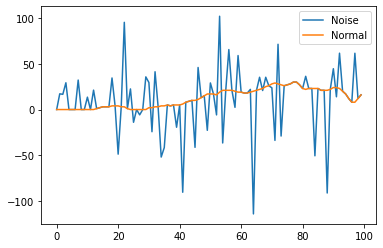

In [ ]:
plt.plot(noisy_data[:100, 43])
plt.plot(data[:100, 43])
plt.legend(["Noise", "Normal"])
plt.show()

In [ ]:
# create train and test batches
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_data[16:], test_size=0.15
)

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(x_train.shape), print(x_test.shape)
print(y_train.shape, y_test.shape)

(80209, 16, 51)
(14155, 16, 51)
(80209, 10) (14155, 10)


In [ ]:
def create_model(learning_rate=1e-4, window_size=16, num_features=51):
    model = Sequential()
    model.add(LSTM(160, input_shape=(window_size, num_features), return_sequences=True ))
    model.add(LSTM(200, ))

    model.add(Dense(10, activation="sigmoid"))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=['categorical_crossentropy'])

    return model

In [ ]:
model = create_model()
model.fit(x_train, y_train, epochs=100, batch_size=256)

Epoch 1/100
314/314 [==============================] - 3s 10ms/step - loss: 1.6910 - categorical_crossentropy: 1.6910
Epoch 2/100
314/314 [==============================] - 3s 9ms/step - loss: 1.0542 - categorical_crossentropy: 1.0542: 0s - loss: 1.0626 - categorical_crossentro
Epoch 3/100
314/314 [==============================] - 3s 8ms/step - loss: 0.9169 - categorical_crossentropy: 0.9169
Epoch 4/100
314/314 [==============================] - 3s 11ms/step - loss: 0.8137 - categorical_crossentropy: 0.8137
Epoch 5/100
314/314 [==============================] - 5s 14ms/step - loss: 0.7411 - categorical_crossentropy: 0.7411
Epoch 6/100
314/314 [==============================] - 7s 23ms/step - loss: 0.6764 - categorical_crossentropy: 0.6764
Epoch 7/100
314/314 [==============================] - 6s 19ms/step - loss: 0.6303 - categorical_crossentropy: 0.6303
Epoch 8/100
314/314 [==============================] - 4s 13ms/step - loss: 0.5830 - categorical_crossentropy: 0.5830
Epoch 9/100
31

In [ ]:
prediction = model.predict(x_test)

In [65]:
correct_count = 0

for i, p in enumerate(prediction):
    # check if predicted labels is the same as test label
    if np.argmax(p) == np.argmax(y_test[i]):
        correct_count += 1

print(f"Accuracy: {correct_count} / {len(prediction)} = {correct_count / len(prediction) * 100:.2f}%")


Accuracy: 13993 / 14155 = 98.86%
